In [32]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
fname='WDomains/MCS_OK/save/wrfout_d03_2018-06-25_03:00:00'

import cartopy.crs as ccrs
import cartopy.feature
with nc.Dataset('/Users/mgrecu/'+fname,'r') as ncfile:
    lon=ncfile.variables['XLONG'][:]
    lat=ncfile.variables['XLAT'][:]
    qrain=ncfile.variables['QRAIN'][:]
    qcloud=ncfile.variables['QCLOUD'][:]
    qice=ncfile.variables['QICE'][:]
    qgraup=ncfile.variables['QGRAUP'][:]
    qsnow=ncfile.variables['QSNOW'][:]
    qv=ncfile.variables['QVAPOR'][:]
    press=ncfile.variables['P'][:]+ncfile.variables['PB'][:]
    tk=ncfile.variables['T'][:]+300.
    u=ncfile.variables['U'][:]
    v=ncfile.variables['V'][:]
    w=ncfile.variables['W'][:]
    height=(ncfile.variables['PHB'][:]+ncfile.variables['PH'][:])/9.8e3


In [37]:
print(height[0,:,0,0])

[0.9710612893104553 1.0241948366165161 1.0919147729873657
 1.1777215003967285 1.2856537103652954 1.4201422929763794
 1.5858986377716064 1.7874956130981445 2.0290656089782715
 2.3136606216430664 2.621925115585327 2.923856735229492 3.220163106918335
 3.511503219604492 3.798457145690918 4.081607818603516 4.361418724060059
 4.638236045837402 4.912273406982422 5.1836466789245605 5.4529571533203125
 5.720634460449219 5.986886024475098 6.251883029937744 6.515860557556152
 6.779306411743164 7.042331218719482 7.304734706878662 7.566348075866699
 7.827099800109863 8.086966514587402 8.346087455749512 8.604801177978516
 8.863443374633789 9.122101783752441 9.380587577819824 9.639120101928711
 9.897138595581055 10.15497875213623 10.412557601928711 10.669720649719238
 10.926426887512207 11.182626724243164 11.437570571899414
 11.690155029296875 11.94043254852295 12.188543319702148
 12.434418678283691 12.678099632263184 12.919905662536621
 13.159931182861328 13.39816951751709 13.634819984436035
 13.869

/Users/mgrecu/miniconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


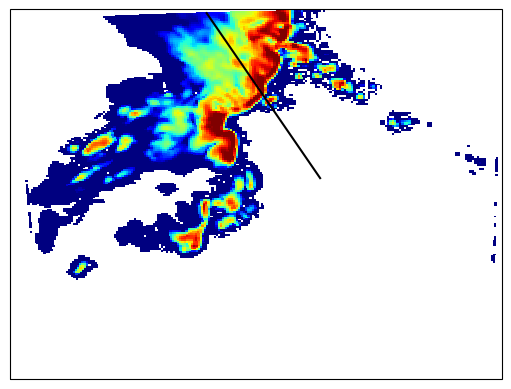

In [40]:
plt.figure()
import matplotlib

ax = plt.axes(projection=ccrs.PlateCarree())

plt.pcolormesh(lon[0,:,:],lat[0,:,:],qrain[-1,3,:,:],transform=ccrs.PlateCarree(),cmap='jet',norm=matplotlib.colors.LogNorm(vmin=1e-5,vmax=3e-3))
nx1=80
dnx=45
plt.plot([lon[0,-1,nx1],lon[0,100,nx1+dnx]],[lat[0,-1,nx1],lat[0,100,nx1+dnx]],'k-',transform=ccrs.PlateCarree())
ny,nx=lon[0,:,:].shape
nxi=128
ix=np.linspace(nx1,nx1+dnx,nxi)
iy=np.linspace(ny-1.01,100,nxi)
lonint=np.linspace(lon[0,-1,nx1],lon[0,100,nx1+dnx],nxi)
latint=np.linspace(lat[0,-1,nx1],lat[0,100,nx1+dnx],nxi)
#calculate distance between points in km using haversine formula
def dist(lon1,lon2,lat1,lat2):
    R=6371.
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=np.sin(dlat/2)**2+np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c=2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    return R*c

qrintL=[]
qvintL=[]
qsintL=[]
qgintL=[]
uintL=[]
vintL=[]
wintL=[]
pressintL=[]
hintL=[]
tintL=[]
eps=1e-3
for i in range(nxi):
    ix1=int(ix[i])
    iy1=int(iy[i])
    fx=ix1-ix[i]
    fy=iy1-iy[i]
    fy=1-fy
    qrint=(1-fx)*(1-fy)*qrain[-1,:,iy1,ix1]+fx*(1-fy)*qrain[-1,:,iy1,ix1+1]+(1-fx)*fy*qrain[-1,:,iy1+1,ix1]+fx*fy*qrain[-1,:,iy1+1,ix1+1]
    w1=1/(((ix1-ix[i])**2+(iy1-iy[i])**2)**0.5+eps)
    w2=1/(((ix1+1-ix[i])**2+(iy1-iy[i])**2)**0.5+eps)
    w3=1/(((ix1-ix[i])**2+(iy1+1-iy[i])**2)**0.5+eps)
    w4=1/(((ix1+1-ix[i])**2+(iy1+1-iy[i])**2)**0.5+eps)
    qrint=(w1*qrain[-1,:,iy1,ix1]+w2*qrain[-1,:,iy1,ix1+1]+w3*qrain[-1,:,iy1+1,ix1]+w4*qrain[-1,:,iy1+1,ix1+1])/(w1+w2+w3+w4)
    #qrint=qrain[-1,:,iy1,ix1]
    qrintL.append(qrint)
    hint=(w1*height[-1,:,iy1,ix1]+w2*height[-1,:,iy1,ix1+1]+w3*height[-1,:,iy1+1,ix1]+w4*height[-1,:,iy1+1,ix1+1])/(w1+w2+w3+w4)
    qgint=(w1*qgraup[-1,:,iy1,ix1]+w2*qgraup[-1,:,iy1,ix1+1]+w3*qgraup[-1,:,iy1+1,ix1]+w4*qgraup[-1,:,iy1+1,ix1+1])/(w1+w2+w3+w4)
    qsint=(w1*qsnow[-1,:,iy1,ix1]+w2*qsnow[-1,:,iy1,ix1+1]+w3*qsnow[-1,:,iy1+1,ix1]+w4*qsnow[-1,:,iy1+1,ix1+1])/(w1+w2+w3+w4)
    qvint=(w1*qv[-1,:,iy1,ix1]+w2*qv[-1,:,iy1,ix1+1]+w3*qv[-1,:,iy1+1,ix1]+w4*qv[-1,:,iy1+1,ix1+1])/(w1+w2+w3+w4)
    tint=(w1*tk[-1,:,iy1,ix1]+w2*tk[-1,:,iy1,ix1+1]+w3*tk[-1,:,iy1+1,ix1]+w4*tk[-1,:,iy1+1,ix1+1])/(w1+w2+w3+w4)
    uint=(w1*u[-1,:,iy1,ix1]+w2*u[-1,:,iy1,ix1+1]+w3*u[-1,:,iy1+1,ix1]+w4*u[-1,:,iy1+1,ix1+1])/(w1+w2+w3+w4)
    vint=(w1*v[-1,:,iy1,ix1]+w2*v[-1,:,iy1,ix1+1]+w3*v[-1,:,iy1+1,ix1]+w4*v[-1,:,iy1+1,ix1+1])/(w1+w2+w3+w4)
    pressint=(w1*press[-1,:,iy1,ix1]+w2*press[-1,:,iy1,ix1+1]+w3*press[-1,:,iy1+1,ix1]+w4*press[-1,:,iy1+1,ix1+1])/(w1+w2+w3+w4)
    wint=(w1*w[-1,:,iy1,ix1]+w2*w[-1,:,iy1,ix1+1]+w3*w[-1,:,iy1+1,ix1]+w4*w[-1,:,iy1+1,ix1+1])/(w1+w2+w3+w4)
    hintL.append(hint)
    qgintL.append(qgint)
    qsintL.append(qsint)
    qvintL.append(qvint)
    tintL.append(tint)
    uintL.append(uint)
    vintL.append(vint)
    pressintL.append(pressint)
    wintL.append(wint)
#import wrf
#calculate dbz from wrf


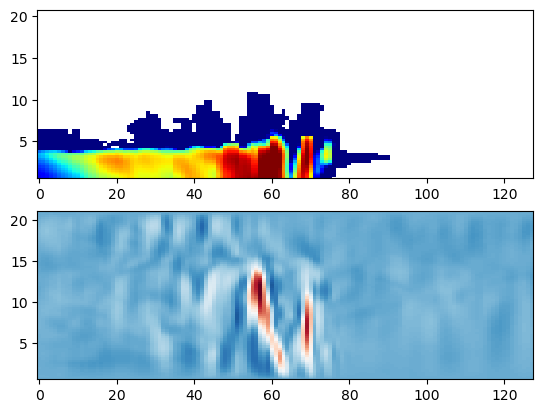

In [41]:
hintL=np.array(hintL)
qrintL=np.array(qrintL)
wintL=np.array(wintL)
plt.subplot(211)
plt.pcolormesh(range(0,nxi),hintL[0,:-1],qrintL.T,cmap='jet',norm=matplotlib.colors.LogNorm(vmin=1e-5,vmax=3e-3))
plt.subplot(212)
plt.pcolormesh(range(0,nxi),hintL[0,:],wintL.T,cmap='RdBu_r',vmin=-5,vmax=15)

In [44]:
print(qrintL.shape)
print(hintL.shape)
lonint=np.linspace(lon[0,-1,nx1],lon[0,100,nx1+dnx],nxi)
latint=np.linspace(lat[0,-1,nx1],lat[0,100,nx1+dnx],nxi)
#calculate distance between points in km using haversine formula
def dist(lon1,lon2,lat1,lat2):
    R=6371.
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=np.sin(dlat/2)**2+np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c=2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    return R*c
d1L=[]
degtorad=np.pi/180.
for i in range(nxi-1):
    d1=dist(lonint[i]*degtorad,lonint[i+1]*degtorad,\
            latint[i]*degtorad,latint[i+1]*degtorad)
    d1L.append(d1)

(128, 83)
(128, 84)


In [49]:
dlon=lonint[5]-lonint[0]
dlat=latint[5]-latint[0]
alpha=np.arctan(dlat/dlon)
print(alpha*180/np.pi)


-55.48423306792602


In [58]:
f=open('input_sounding','w')

z=hintL[120][:]
t=tintL[120][:]
q=qvintL[120][:]

press=pressintL[120][:]
print(z.shape)
print(t.shape)
print(press.shape)
#th1d=t*(1e5/p)**(287/1004)
psf=np.interp(z[0],z[:-1],press)
qsf=np.interp(z[0],z[:-1],q)
tsf=np.interp(z[0],z[:-1],t)
#ts=np.interp([0],z[12,::-1,ny1+6,nx2-6],t[12,::-1,ny1+6,nx2-6])
#qs=np.interp([0],z[12,::-1,ny1+6,nx2-6],q[12,::-1,ny1+6,nx2-6])
#print(ps,ts,qs)

f.write("%7.2f %7.2f %7.2f \n"%(psf/1e2,tsf,qsf*1e3))


for k in range(82):
    hm=z[k:k+1].mean()
    xout=hm*1e3,t[k],q[k]*1e3,uintL[120][k]*np.cos(alpha)+vintL[120][k]*np.sin(alpha),0
    print('%8.2f %7.2f %7.3f %7.2f %7.2f' % xout)
    f.write('%8.2f %7.2f %7.3f %7.2f %7.2f \n'%xout)

f.close()

(84,)
(83,)
(83,)
    0.33  305.47  15.473   -8.02    0.00
    0.38  305.87  15.375  -11.40    0.00
    0.45  306.28  15.232  -14.45    0.00
    0.54  306.80  15.007  -17.39    0.00
    0.65  307.46  14.676  -19.75    0.00
    0.78  308.23  14.168  -20.17    0.00
    0.95  309.28  12.732  -19.14    0.00
    1.16  309.98  12.188  -17.61    0.00
    1.41  310.56  11.966  -15.65    0.00
    1.71  311.23  11.744  -13.32    0.00
    2.04  312.19  11.620   -9.99    0.00
    2.36  313.21  11.701   -6.48    0.00
    2.68  314.24  11.615   -3.22    0.00
    3.00  315.87   9.507   -1.14    0.00
    3.31  318.07   5.811   -0.95    0.00
    3.62  320.10   3.000   -1.17    0.00
    3.93  321.49   1.842   -0.66    0.00
    4.23  322.21   1.702    0.06    0.00
    4.53  322.48   1.879    0.34    0.00
    4.83  322.60   1.998    0.16    0.00
    5.13  322.72   1.970   -0.14    0.00
    5.42  322.81   1.881   -0.09    0.00
    5.71  322.86   1.776    0.47    0.00
    6.00  323.14   1.537    1.06    0.0

In [45]:
print(np.mean(d1L))

3.1133108634945055


In [48]:
import xarray as xr
qv2d=xr.DataArray(qrintL,dims=['x','z'])
qs2d=xr.DataArray(qsintL,dims=['x','z'])
qr2d=xr.DataArray(qrintL,dims=['x','z'])
qg2d=xr.DataArray(qgintL,dims=['x','z'])
t2d=xr.DataArray(tintL,dims=['x','z'])
u2d=xr.DataArray(uintL,dims=['x','z'])
v2d=xr.DataArray(vintL,dims=['x','z'])
w2d=xr.DataArray(wintL,dims=['x','z1'])
p2d=xr.DataArray(pressintL,dims=['x','z'])
h2d=xr.DataArray(hintL,dims=['x','z1'])
itime=-1
dset=xr.Dataset({'qv':qv2d,'qs':qs2d,'qr':qr2d,'qg':qg2d,'t':t2d,'u':u2d,'v':v2d,'w':w2d,'p':p2d,'h':h2d})
dset.to_netcdf('wrf_mcs_ok-06-25_03:00:00%3.3i_%3.3i_%3.3i_%3.3i_%3.3i.nc'%(itime,nx1,nx1+dnx,ny-1,100))